In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import spacy
import re


nlp = spacy.load('en_core_web_sm')

In [5]:
data_text = "doornumber is 26-2-229, streetnumber is third street, streetname is chandra mouli nagar, cityname is vedayapalem, districtname is nellore, pincode is 524004, name is Surya Kiran Paluru, companyname is #, countryname is #"

"""doornumber is 26-2-229,
     streetnumber is third street,
       streetname is chandra mouli nagar,
         cityname is vedayapalem,
           districtname is nellore,
             pincode is 524004,
               name is Surya Kiran Paluru,
                 companyname is #,
                   countryname is #"""

'doornumber is 26-2-229,\n     streetnumber is third street,\n       streetname is chandra mouli nagar,\n         cityname is vedayapalem,\n           districtname is nellore,\n             pincode is 524004,\n               name is Surya Kiran Paluru,\n                 companyname is #,\n                   countryname is #'

In [6]:

data_text_sep = data_text.split(',')

for i in range(len(data_text_sep)):
    data_text_sep[i] = re.split(r" is ", data_text_sep[i])
    data_text_sep[i].extend(["is"])

entity_pairs = data_text_sep


In [7]:
source = [i[0] for i in entity_pairs]

for x in source:
    entity_pairs.extend([["Address",x,"has"]])


source = [i[0] for i in entity_pairs]

target = [i[1] for i in entity_pairs]

relations = [i[2] for i in entity_pairs]



In [8]:


kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [9]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

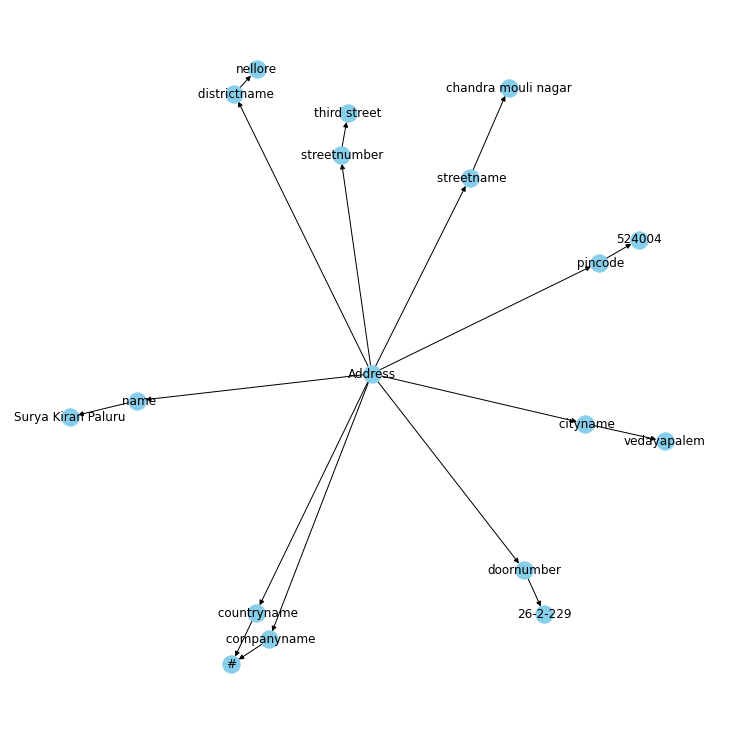

In [10]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G)
nx.draw_spring(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues)
plt.show()